<a href="https://colab.research.google.com/github/mahalingamb1978/MLAlgorithms/blob/main/P6_EDA_%26_Model_1_%26_Sepsis_Api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stella Achar Oiro

Team Equity

stella.achar@azubiafrica.org

#**Early Prediction of Sepssis from Clinical Data**

##**Introduction**
Sepsis is a life-threatening condition that occurs when the body’s response to infection causes tissue damage,organ failure, or death. About 30 millions people develop sepsis and one-fifth of them die from the disease every year around the world. Detecting sepsis early and starting immediate treatment often save patients lives.

##**Project Goal**
The goal of this project is to early detect sepsis (6 hours ahead) using physiological data. The inputs are patients' information, including vital signs, laboratory values and demographics. The output is the results whether the model predicts non-Sepsis patients or Sepsis patients six hours ahead of clinical onset time.

##**Imported Packages and Modules**

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#statistics
import scipy.stats as stats

# Preprocessing and Feature Engineering
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder

# Models
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Exports
import os, pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Load the datasets**

In [ ]:
# Load the data
df_test = pd.read_csv('/content/drive/MyDrive/Paitients_Files_Test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Paitients_Files_Train.csv')

##**Hypothesis**
**H0:** The sample has a Gaussian distribution in the numerical feautures.

**H1:** The sample does not have a Gaussian distribution in the numerical feautures.

##**Questions**

1. How many patients have the tendency of developing sepsis?
2. Which age group are more prone to developing sepsis?
3. Does having an insurance enhance patients chances of getting sepsis?
4. Is body mass directly correlated with a patients tendency to get sepsis?
5. Does the blood parameters associated with sepsis?

In [ ]:
# Check the shapes
df_test.shape, df_train.shape

# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [ ]:
df_train

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [ ]:
df_train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [ ]:
df_test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
5,ICU200614,4,183,0,0,0,28.4,0.212,36,1
6,ICU200615,1,124,60,32,0,35.8,0.514,21,1
7,ICU200616,1,181,78,42,293,40.0,1.258,22,1
8,ICU200617,1,92,62,25,41,19.5,0.482,25,0
9,ICU200618,0,152,82,39,272,41.5,0.270,27,0


In [ ]:
# Information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [ ]:
# checking for missing values in the train dataset
df_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [ ]:
# checking for missing values in the test dataset
df_test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [ ]:
# checking for missing values in the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [ ]:
# check for duplicated values
df_train.duplicated().sum()

0

In [ ]:
# Statiscally overview of the dataset
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check of outliers by applying the IQR method checking on the train dataset
numerical_features = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
df = df_train[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()

PRG    True
PL     True
PR     True
SK     True
TS     True
M11    True
BD2    True
Age    True
dtype: bool

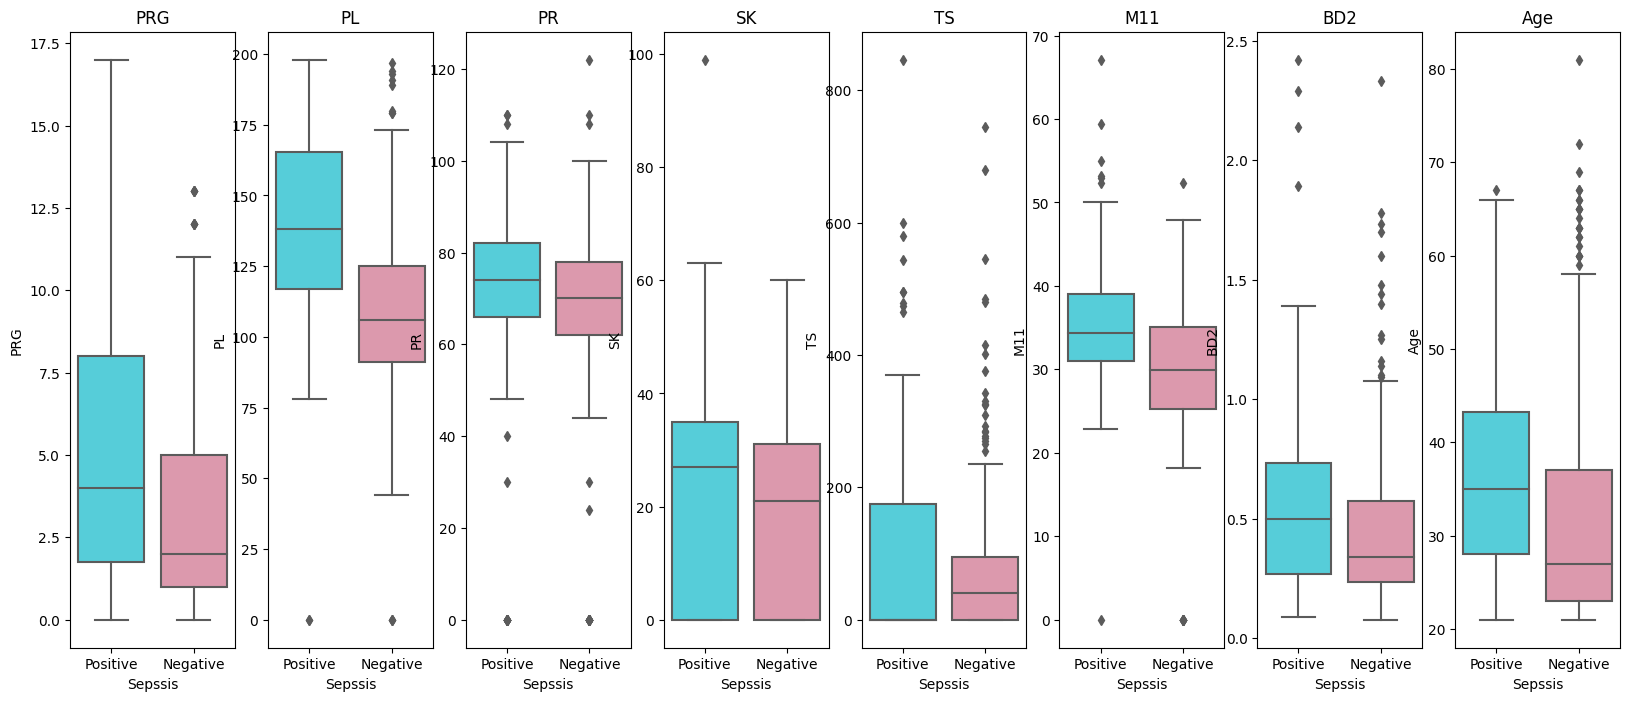

In [ ]:
# box plot for checking outliers
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Sepssis']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
continues_features = [x for x in all_features if x not in categorical_features]
color = ('#40DFEF', '#E78EA9')
fig, ax = plt.subplots(1, 8, figsize=(20,8))
for i, p in enumerate(continues_features) :
        sns.boxplot(data=df_train, x='Sepssis', y=p, ax=ax[i], palette= color,whis = 1.5)
        ax[i].set_title(p)



There are outliers in the numerical features

##**Trim the outliers**

Trimming removes the bad data from the dataset

In [ ]:
numerical_features = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
df = df_train[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [ ]:
df_trim = df_train.copy()

In [ ]:
def iqr_trimming(df_train, cols, factor):

    drop_outliers = np.array([])

    for col in cols:

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        s = df_train[col]

        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index

        drop_outliers = np.append(drop_outliers, indexes)

    return drop_outliers

In [ ]:
dropped = np.unique(iqr_trimming(df_trim, numerical_features, 1.5))

In [ ]:
df_trim.drop(dropped, inplace=True)

In [ ]:
df_trim.shape

(493, 11)

In [ ]:
df_train.shape

(599, 11)

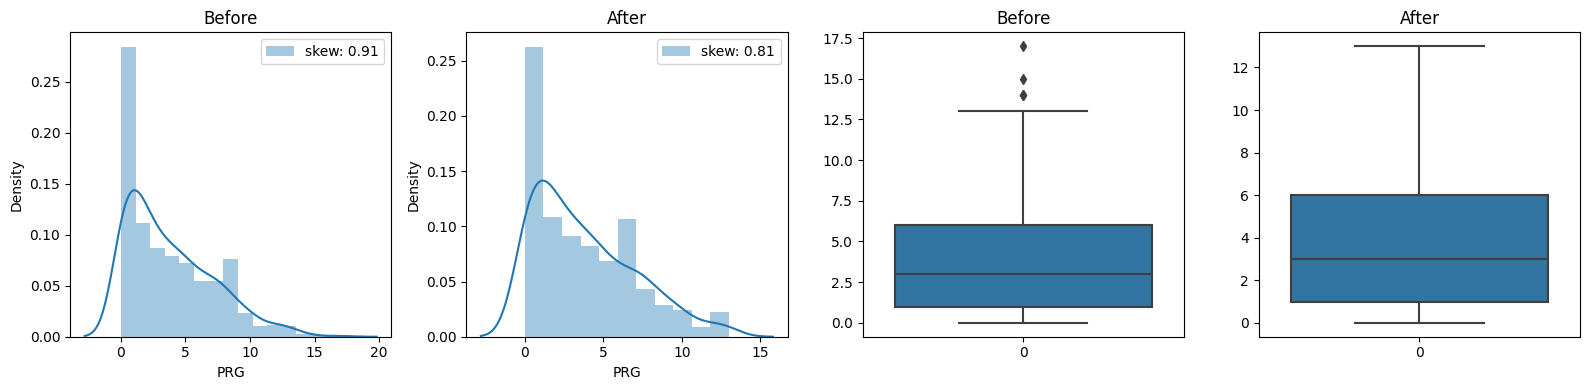

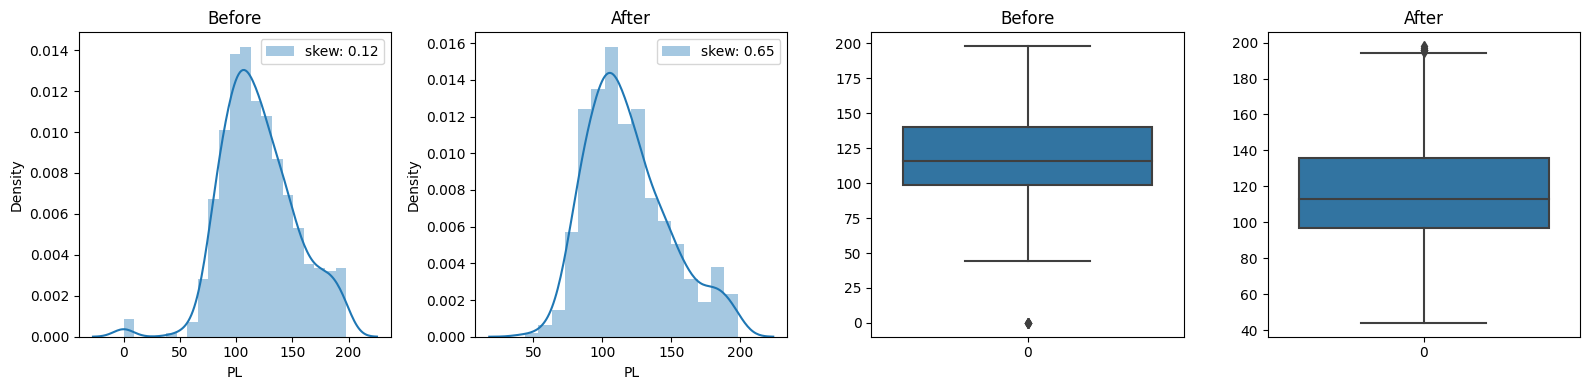

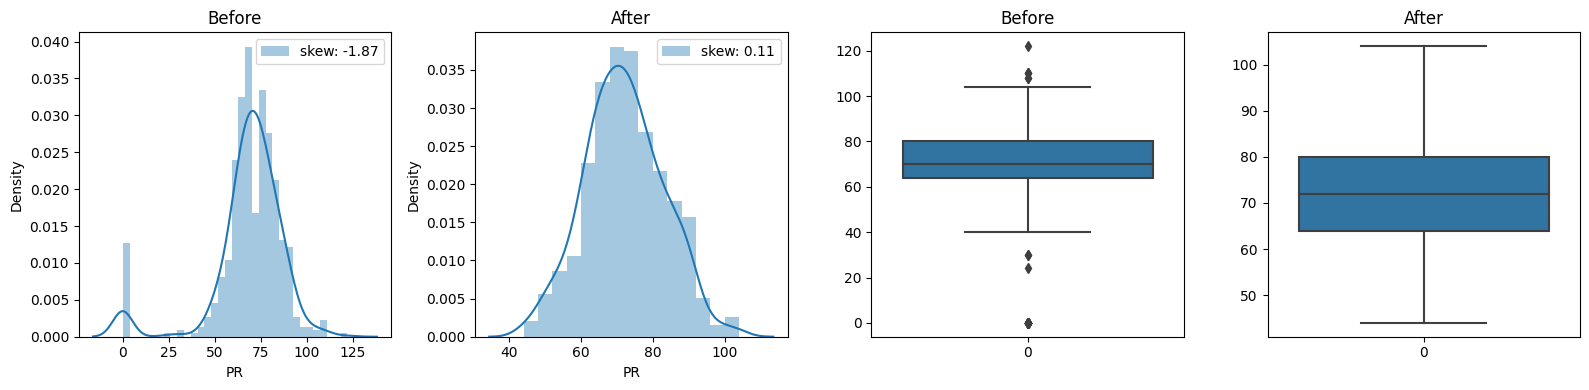

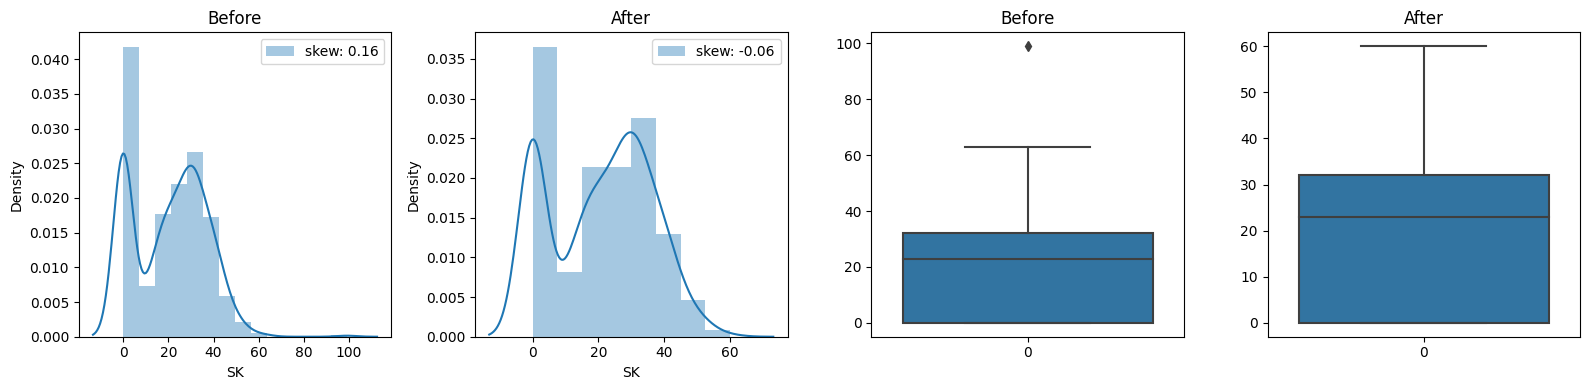

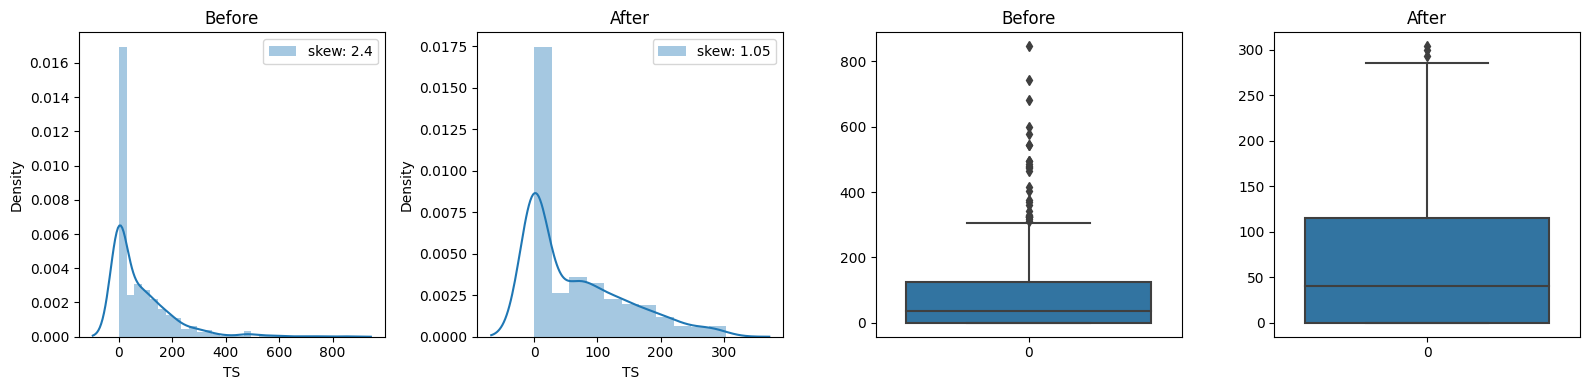

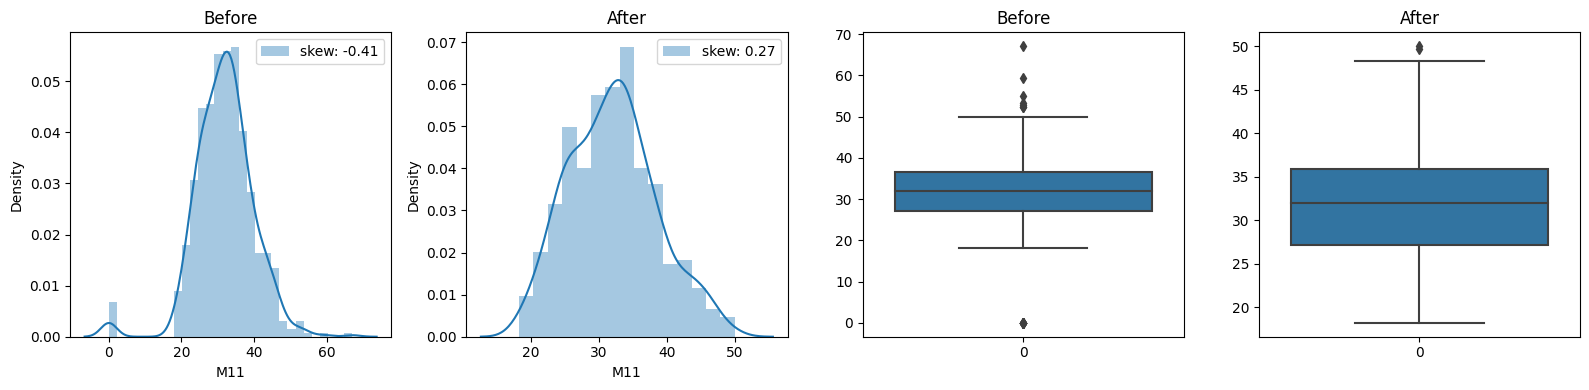

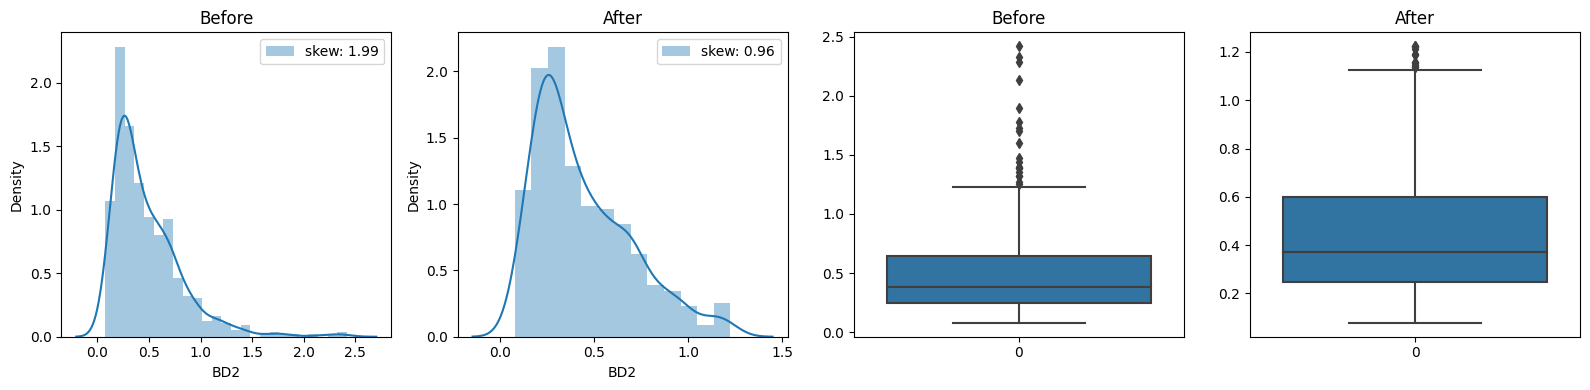

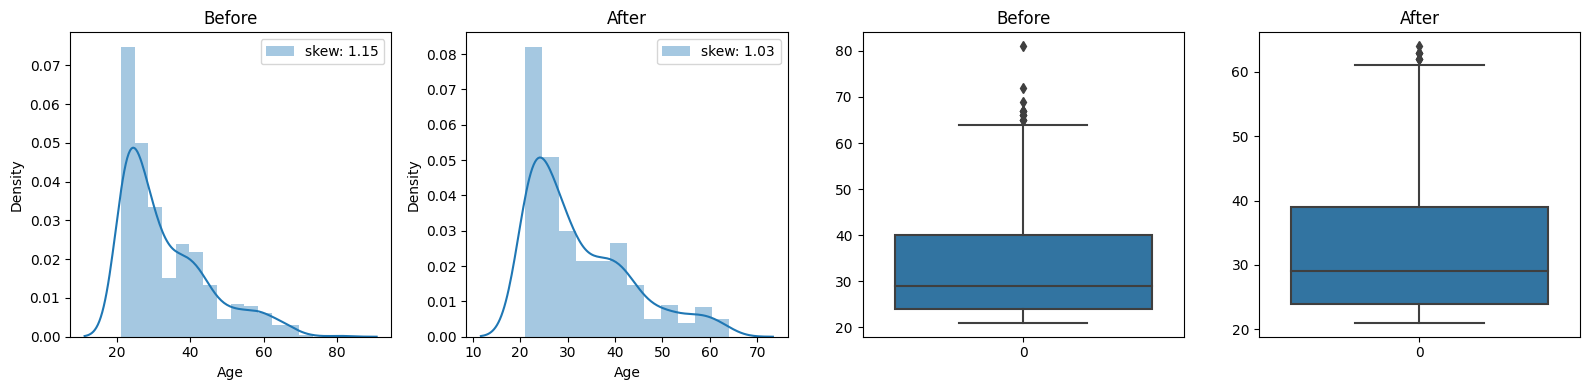

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(df_trim[col], label="skew: " + str(np.round(df_trim[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(df_train[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(df_trim[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

##**Exploratory Data Analysis**

##**Bivariate Analysis**

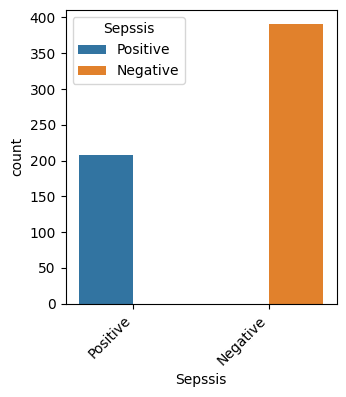

In [ ]:
# Setup figure
cols = 5
rows = 4
fig = plt.figure(figsize= (15,15))

# Plotting
all_categorics = df_train.select_dtypes(include='object')
categoric_columns = all_categorics.columns[all_categorics.nunique()<5]
for i, col in enumerate(categoric_columns):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=df_train[col], hue='Sepssis', data=df_train, ax=ax)
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

# Multivariate Analysis

<Axes: >

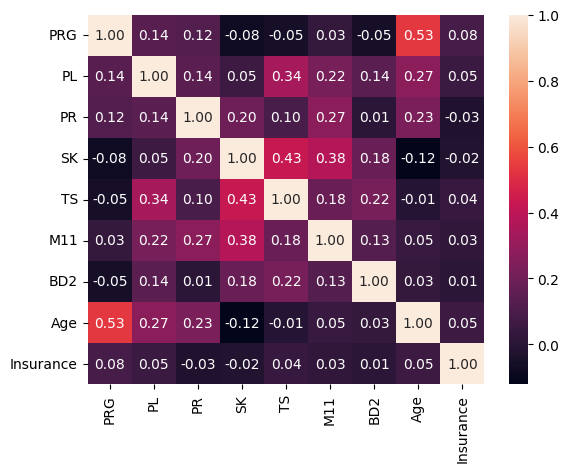

In [ ]:
# correlation heatmap df
correlation = df_train.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

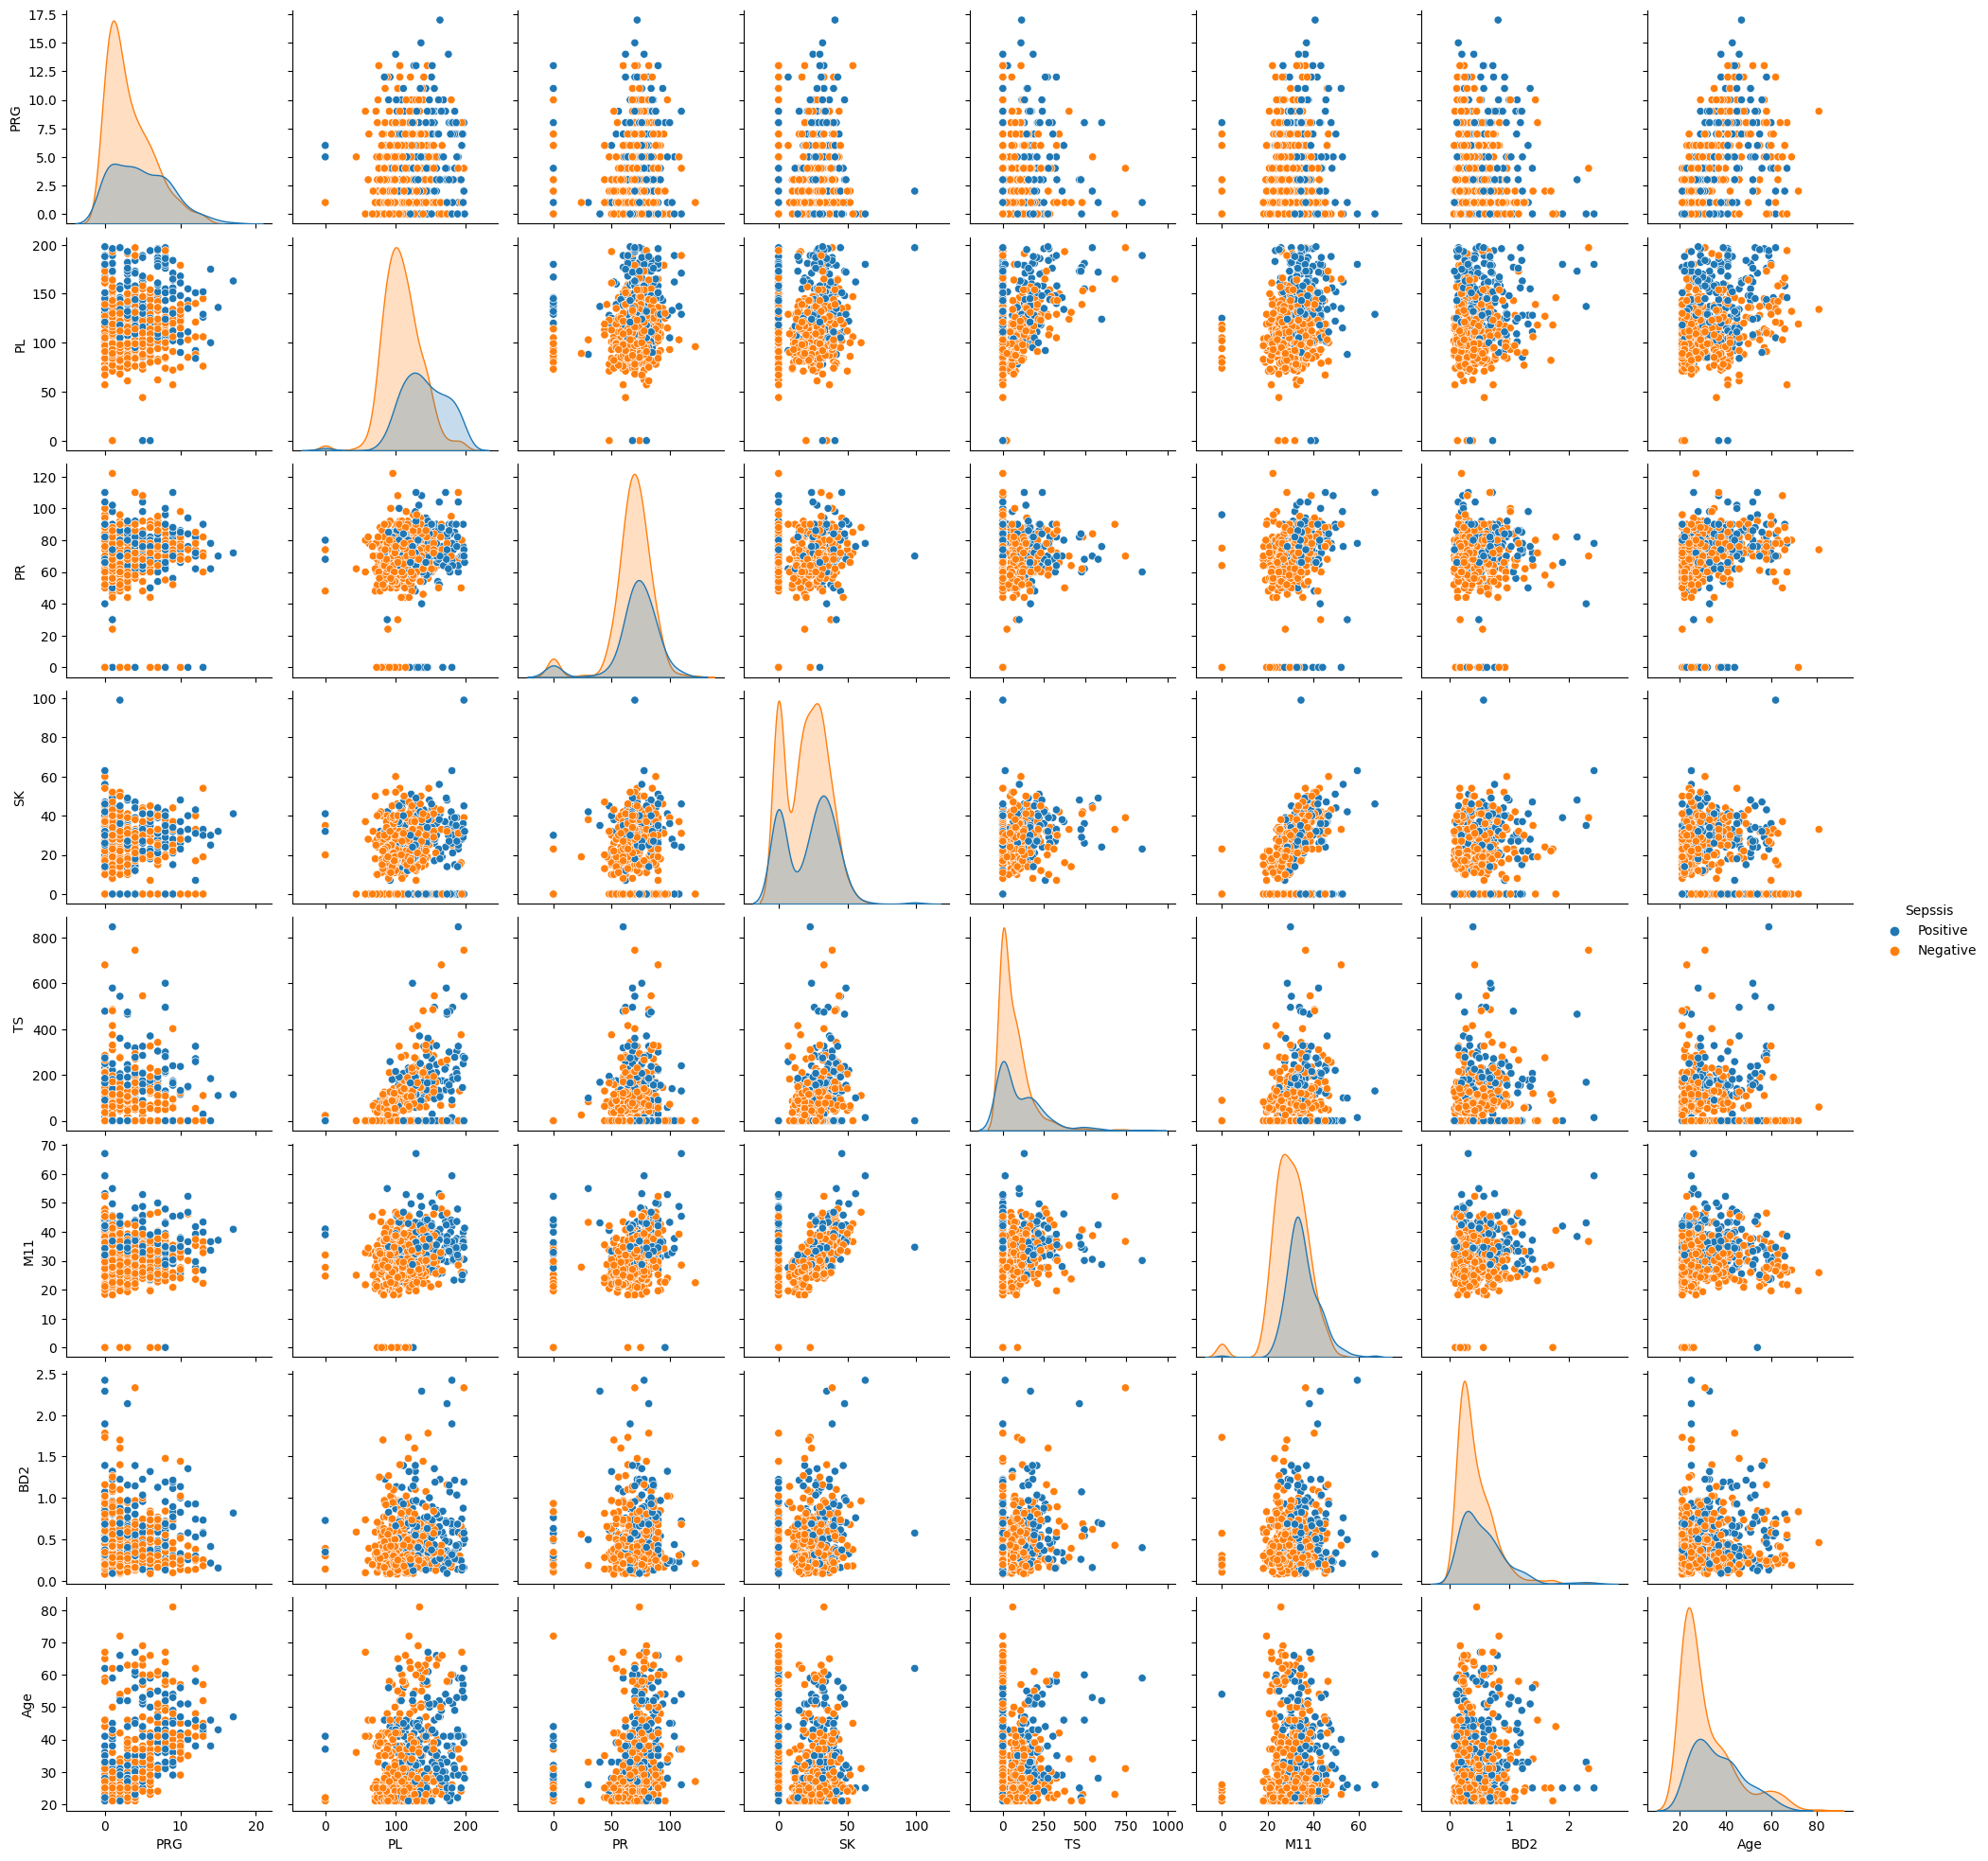

In [ ]:
sns.pairplot(df_train,vars = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], hue="Sepssis")

###**Hypothesis validation**
Statistical Normality Tests determine if a dataset is normally distributed around the mean value. it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.

Gaussian distribution, however, is a continuous probability distribution with symmetrical sides around its center. Its mean, median and mode are equal.

Popular normality tests - D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

There are eight numerical features in this dataset - PRG, PL, PR, SK, TS, M11, BD2, Age.

##**D’Agostino’s K^2 Test**
###**PRG**

In [ ]:
stat, p = stats.normaltest(df_train['PRG'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')

else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=65.49338, p=0.000
Sample does not look Gaussian (reject H0)


###**PL**

In [ ]:
stat, p = stats.normaltest(df_train['PL'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')

else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=10.08525, p=0.006
Sample does not look Gaussian (reject H0)


###**BD2**

In [ ]:
stat, p = stats.normaltest(df_train['BD2'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')

else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=266.81137, p=0.000
Sample does not look Gaussian (reject H0)


###**1. How many patients have the tendency of developing sepsis?**
208 patient have the tendency of developing sepsis

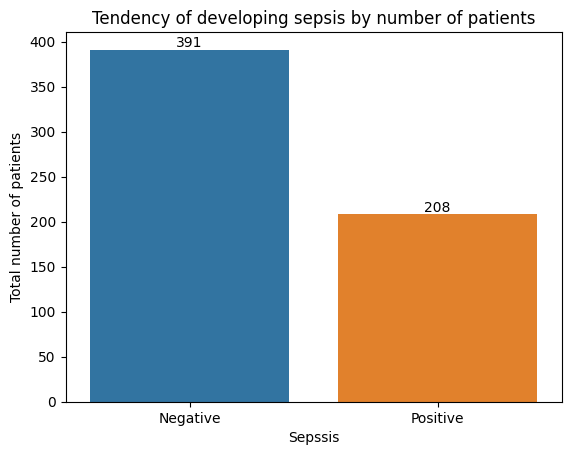

In [ ]:
sep  = df_train.groupby('Sepssis', as_index=False)['ID'].count()
splot = sns.barplot(data=sep, y='ID', x='Sepssis')
plt.xlabel("Sepssis")
plt.ylabel("Total number of patients")
plt.title('Tendency of developing sepsis by number of patients')
plt.bar_label(splot.containers[0], size=10)
plt.show()

###**2.  Which age group are more prone to developing sepsis?**
People between 20-30 years have higher tendency of getting sepsis.
Our Null hypothesis is therefore False and the alternate hypothesis proven true

Text(0.5, 1.0, 'Age group of patients with sepsis')

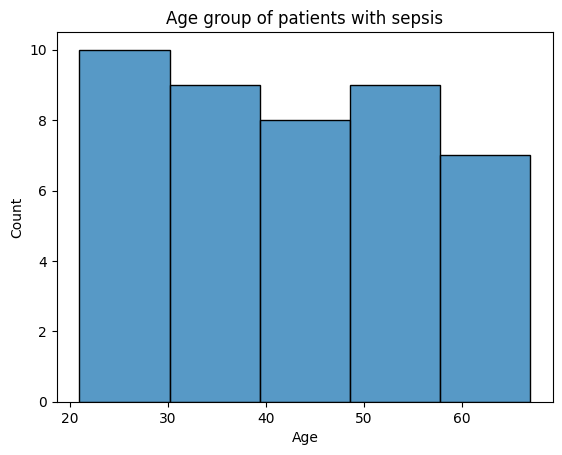

In [ ]:
#age group count of patients with sepsis

age_group = df_train[df_train.Sepssis == 'Positive'].groupby('Age', as_index=False)['ID'].count()
sns.histplot(data=age_group, x="Age", bins=5)
plt.title('Age group of patients with sepsis')

###**3. Does having an insurance enhance patients chances of getting sepsis?**
No, majority of patients with insurance have no tendency of developing sepsis

Text(0.5, 1.0, 'Insurance of all patients')

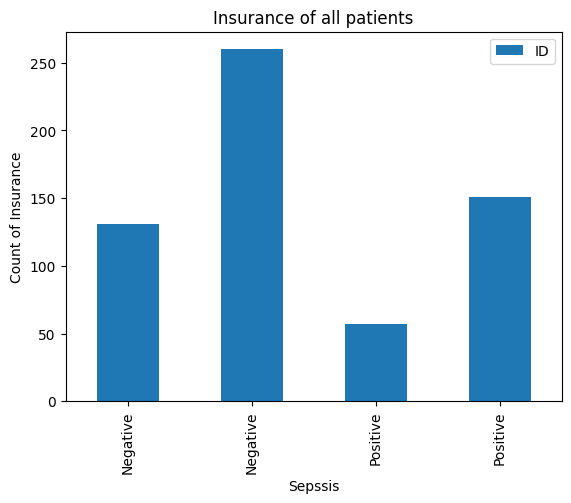

In [ ]:
insured = df_train.groupby(['Sepssis', 'Insurance'], as_index=False)['ID'].count()
insured.plot(kind='bar', x='Sepssis', y='ID')
plt.ylabel('Count of Insurance')
plt.title('Insurance of all patients')

###**4. Is body mass directly correlated with a patients tendency to get sepsis?**
Per the histogram used to visualize the data, majority of sepsis patient are between a body mass of 30-40. However, there are even a greater number of people with the same body mass without sepsis hence it cannot be concluded that the tendency of a patient getting sepsis is correlated with their body weight.

Text(0.5, 1.0, 'Body mass of patient without Sepsis')

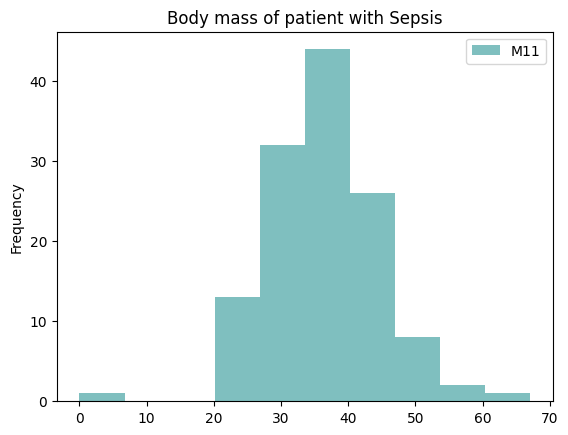

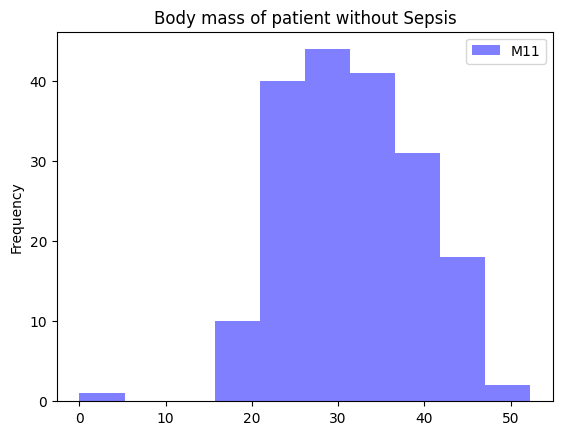

In [ ]:
body_mass = df_train.groupby(['Sepssis', 'M11'], as_index=False)['ID'].count()
hist1 = body_mass[body_mass.Sepssis == 'Positive']
hist2 = body_mass[body_mass.Sepssis == 'Negative']
hist1.plot(kind='hist', column = 'M11', bins = 10, color = 'teal', \
           alpha = 0.5 )
plt.title('Body mass of patient with Sepsis')

hist2.plot(kind='hist', column = 'M11', bins = 10, color = 'blue', \
            alpha = 0.5)
plt.title('Body mass of patient without Sepsis')


###**5. Does the blood parameters associated with sepsis?**

The plot below shows that blood is affected by sepssis

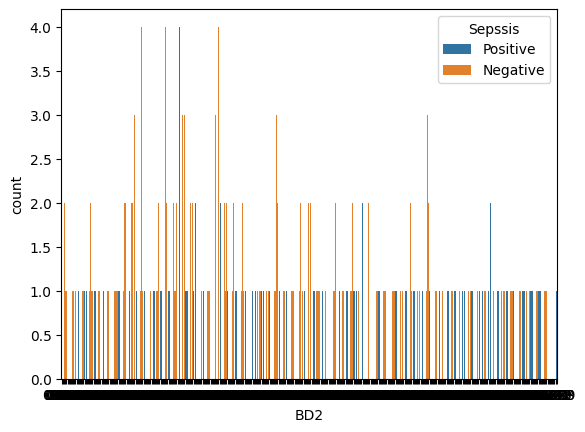

In [ ]:
sns.countplot(data = df_train,
              x = 'BD2', hue = 'Sepssis')
plt.show()

##**Data preprocessing and Engineering**


###**Data Imbalance Check**

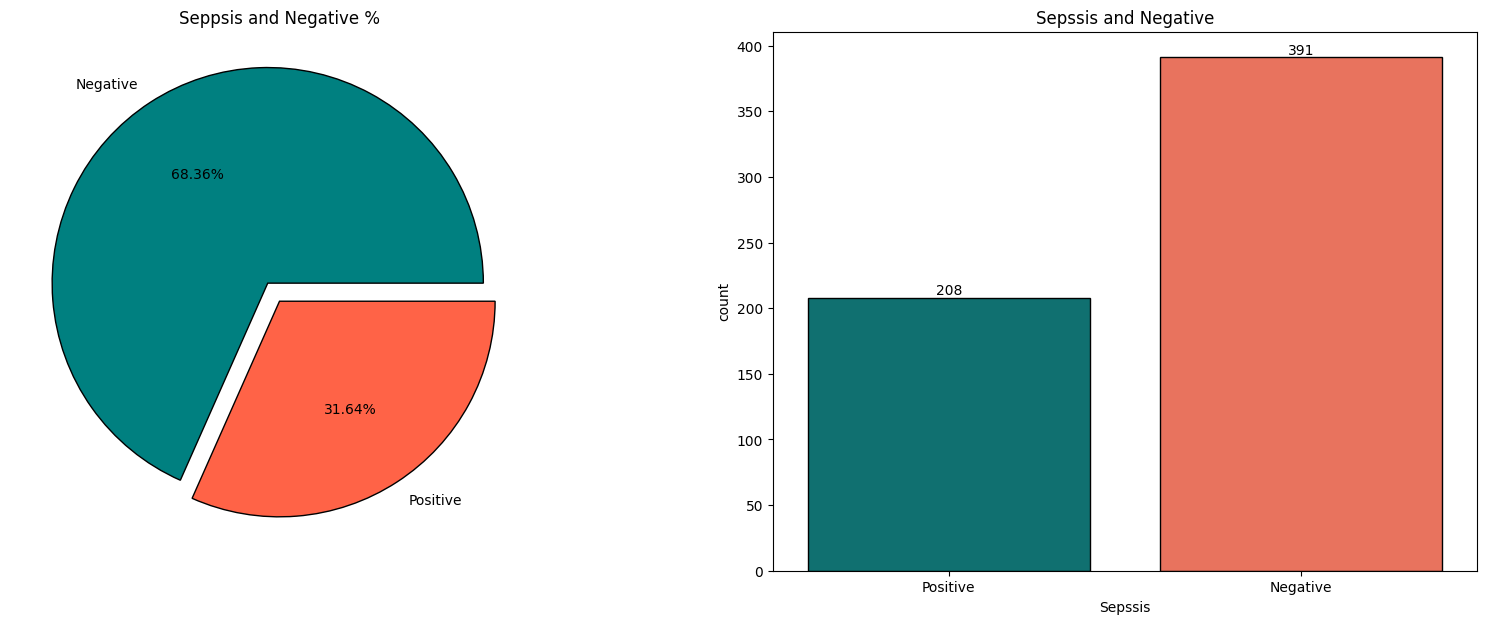

In [ ]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

l1 = list(df_trim['Sepssis'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Negative','Positive'],
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Seppsis and Negative %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df_train,
                   x='Sepssis',
                   palette = palette,
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Positive','Negative'])

plt.title('Sepssis and Negative')
plt.show()

In [ ]:
categoric_columns = ['ID']
numeric_columns =  [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

In [ ]:
# Label Encoder on the target column
le = LabelEncoder()
df=df_trim
df[['Sepssis']] = df[['Sepssis']].apply(le.fit_transform)
X = df.drop('Sepssis', axis=1)
y = df['Sepssis']

##**Categorical Encoding**

In [ ]:
# Encode the categorical variables in the train data
# calling our encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first")
# setting output to DataFrame
encoder.set_output(transform="pandas")
# encoding our data
Encoded_train = encoder.fit_transform(df_trim[categoric_columns])

##**Scaling**

In [ ]:
X = df_trim.drop('ID', axis=1) #train data
# Scaling on train dataset
Scaler = MinMaxScaler()
train = Scaler.fit(X).set_output(transform="pandas")
scaled_train = train.transform(X)

# join the scaled and encoded data
train_data = pd.concat([scaled_train, Encoded_train], axis=1)

#Resampling the minority of the target variable using smote
X = train_data.drop(columns=["Sepssis"])
y = train_data["Sepssis"]

smote = SMOTE(sampling_strategy="minority")
X, y = smote.fit_resample(X, y)
y.value_counts()


1.0    337
0.0    337
Name: Sepssis, dtype: int64

##**Split The Dataset**

In [ ]:
# Split the dataframe into train and eval
X_train, X_eval, y_train, y_eval=train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
df_train['ID'].unique()

array(['ICU200010', 'ICU200011', 'ICU200012', 'ICU200013', 'ICU200014',
       'ICU200015', 'ICU200016', 'ICU200017', 'ICU200018', 'ICU200019',
       'ICU200020', 'ICU200021', 'ICU200022', 'ICU200023', 'ICU200024',
       'ICU200025', 'ICU200026', 'ICU200027', 'ICU200028', 'ICU200029',
       'ICU200030', 'ICU200031', 'ICU200032', 'ICU200033', 'ICU200034',
       'ICU200035', 'ICU200036', 'ICU200037', 'ICU200038', 'ICU200039',
       'ICU200040', 'ICU200041', 'ICU200042', 'ICU200043', 'ICU200044',
       'ICU200045', 'ICU200046', 'ICU200047', 'ICU200048', 'ICU200049',
       'ICU200050', 'ICU200051', 'ICU200052', 'ICU200053', 'ICU200054',
       'ICU200055', 'ICU200056', 'ICU200057', 'ICU200058', 'ICU200059',
       'ICU200060', 'ICU200061', 'ICU200062', 'ICU200063', 'ICU200064',
       'ICU200065', 'ICU200066', 'ICU200067', 'ICU200068', 'ICU200069',
       'ICU200070', 'ICU200071', 'ICU200072', 'ICU200073', 'ICU200074',
       'ICU200075', 'ICU200076', 'ICU200077', 'ICU200078', 'ICU2

##**Model Building**

In [ ]:
# Define the models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
KNN_model =  KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=42)


# Fit the models
logreg = logreg_model.fit(X_train, y_train)
rf = rf_model.fit(X_train, y_train)
gb = gb_model.fit(X_train, y_train)
KNN = KNN_model.fit(X_train,y_train)
dt = dt_model.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg.predict(X_eval)
rf_preds = rf.predict(X_eval)
gb_preds = gb.predict(X_eval)
KNN_preds = KNN.predict(X_eval)
dt_preds = dt.predict(X_eval)



# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_eval, logreg_preds)
rf_accuracy = accuracy_score(y_eval, rf_preds)
gb_accuracy = accuracy_score(y_eval, gb_preds)
KNN_accuracy = accuracy_score(y_eval, KNN_preds)
dt_accuracy = accuracy_score(y_eval, dt_preds)

logreg_precision = precision_score(y_eval, logreg_preds)
rf_precision = precision_score(y_eval, rf_preds)
gb_precision = precision_score(y_eval, gb_preds)
KNN_precision = precision_score(y_eval, KNN_preds)
dt_precision = precision_score(y_eval, dt_preds)


logreg_recall = recall_score(y_eval, logreg_preds)
rf_recall = recall_score(y_eval, rf_preds)
gb_recall = recall_score(y_eval, gb_preds)
KNN_recall = recall_score(y_eval, KNN_preds)
dt_recall = recall_score(y_eval, dt_preds)


logreg_f1 = f1_score(y_eval, logreg_preds)
rf_f1 = f1_score(y_eval, rf_preds)
gb_f1 = f1_score(y_eval, gb_preds)
KNN_f1 = f1_score(y_eval, KNN_preds)
dt_f1 = f1_score(y_eval, dt_preds)


logreg_roc_auc = roc_auc_score(y_eval, logreg_preds)
rf_roc_auc = roc_auc_score(y_eval, rf_preds)
gb_roc_auc = roc_auc_score(y_eval, gb_preds)
KNN_roc_auc = roc_auc_score(y_eval, KNN_preds)
dt_roc_auc = roc_auc_score(y_eval, dt_preds)

In [ ]:
compare_models = ['Logistic Regression','Random forest','Gradient Boosting','KNearestNeighborsClassifier','Decision Tree Classifier',]

data={'Accuracy':[logreg_accuracy,rf_accuracy,gb_accuracy,KNN_accuracy,dt_accuracy],
      'Recall':[logreg_recall,rf_recall,gb_recall,KNN_recall,dt_recall],
      'Precision':[logreg_precision,rf_precision,gb_precision,KNN_precision,dt_precision],
      'f1_score':[logreg_f1,rf_f1,gb_f1,KNN_f1,dt_f1],
      'ROC_AUC':[logreg_roc_auc,rf_roc_auc,gb_roc_auc,KNN_roc_auc,dt_roc_auc],
      'Description':['','best model','','','']}
result= pd.DataFrame(data=data, index=compare_models)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC,Description
Logistic Regression,0.866667,0.880597,0.855072,0.867647,0.866769,
Random forest,0.896296,0.880597,0.907692,0.893939,0.896181,best model
Gradient Boosting,0.851852,0.835821,0.861538,0.848485,0.851734,
KNearestNeighborsClassifier,0.496296,1.000000,0.496296,0.663366,0.500000,
Decision Tree Classifier,0.800000,0.761194,0.822581,0.790698,0.799715,


In [ ]:
kf_RF = KFold(n_splits = 5,shuffle=True)

In [ ]:
# Hyperparameter Tuninng For the best model

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [2,4,10, None]

# minimum number of samples required to split a node
min_samples_split = [2,5]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

# Method of selecting Samples for training each tree
bootstrap = [True]

# create param grid

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}


# make GridSearchCV object
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = kf_RF, verbose = 2 , n_jobs = -1, scoring='f1')
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 36}

In [ ]:
RF_model_tuned = RandomForestClassifier(bootstrap = True,
                                    max_depth = None,
                                    max_features = 'log2',
                                    min_samples_leaf = 1,
                                    min_samples_split =  2,
                                    n_estimators = 65)

# performance evaluation the test data
RF_model_tuned.fit(X_train, y_train)
y_pred_grid = RF_model_tuned.predict(X_eval)
print(classification_report(y_pred_grid, y_eval))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        72
         1.0       0.87      0.92      0.89        63

    accuracy                           0.90       135
   macro avg       0.90      0.90      0.90       135
weighted avg       0.90      0.90      0.90       135



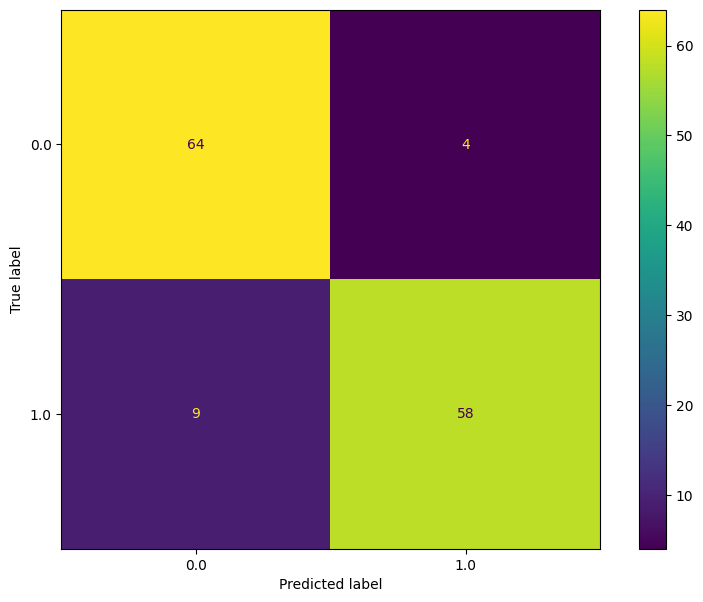

In [ ]:
# the confusion matrix for the Best Model


fig, ax = plt.subplots(figsize=(10,7))
y_pred_RF = rf_Grid.best_estimator_.predict(X_eval)

cm = confusion_matrix(y_eval, y_pred_RF, labels=rf_Grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_Grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Predict on the test data
y_pred_RF = rf_Grid.best_estimator_.predict(X_eval)

print(y_pred_RF)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]


In [ ]:
# Export Encoder
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

# Export Scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(Scaler, file)

# Export Model
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [ ]:
!pip install fastapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install uvicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
from fastapi import FastAPI
from pydantic import BaseModel

# Define your ML model input schema
class PredictionInput(BaseModel):
    PRG: int
    PL: int
    PR: int
    SK: int
    TS: int
    M11: float
    BD2: float
    Age: int
    Insurance: int

# Load the exported objects
with open('/content/encoder.pkl', 'rb') as file:
    encoder = pickle.load(file)

with open('/content/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

with open('/content/model.pkl', 'rb') as file:
    model = pickle.load(file)

# Create the FastAPI app
app = FastAPI(title='Sepsis API', description='An API that takes input and displays the predictions', version='0.1.0')

# Define the prediction endpoint
@app.post('/Sepsis')
def predict(input_data: PredictionInput):
    # Preprocess the input features
    encoded_features = encoder.transform([[input_data.PRG, input_data.PL, input_data.PR, input_data.SK, input_data.TS, input_data.M11, input_data.BD2, input_data.Age, input_data.Insurance]])
    scaled_features = scaler.transform(encoded_features)

    # Make predictions using the model
    predictions = model.predict(scaled_features)

    # Labeling Model output
    if prediction[0] < 0.5:
        prediction_label = "Negative. This person does not have Sepsis."
    else:
        prediction_label = "Positive. This person has Sepsis."

    # Return the predictions
    return {'predictions': predictions.tolist()}




In [ ]:
import asyncio

async def main():
    # Do something asynchronous

     asyncio.run(main())

# This cell will not have an event loop running, so you can use
# the `uvicorn.run()` function here.

     uvicorn.run("API_app:app", host='127.0.0.1', port=8091, reload=True)


In [ ]:
!pip install docker


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create a Dockerfile
%%writefile Dockerfile
FROM python:3.9-slim

WORKDIR /app

COPY requirements.txt .

RUN pip install -r requirements.txt

COPY . .

EXPOSE 8091

CMD ["uvicorn", "API_app:app", "--host", "0.0.0.0", "--port", "8091", "--reload"]


Overwriting Dockerfile


In [ ]:
%%writefile requirements.txt
fastapi==0.95.2
uvicorn==0.15.0
pydantic==1.10.7


Overwriting requirements.txt


In [ ]:
%%writefile main.py
from fastapi import FastAPI

# Define your ML model input schema
class PredictionInput(BaseModel):
    PRG: int
    PL: int
    PR: int
    SK: int
    TS: int
    M11: float
    BD2: float
    Age: int
    Insurance: int

# Load the exported objects
with open('/content/encoder.pkl', 'rb') as file:
    encoder = pickle.load(file)

with open('/content/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

with open('/content/model.pkl', 'rb') as file:
    model = pickle.load(file)

# Create the FastAPI app
app = FastAPI(title='Sepsis API', description='An API that takes input and displays the predictions', version='0.1.0')

# Define the prediction endpoint
@app.post('/Sepsis')
def predict(input_data: PredictionInput):
    # Preprocess the input features
    encoded_features = encoder.transform([[input_data.PRG, input_data.PL, input_data.PR, input_data.SK, input_data.TS, input_data.M11, input_data.BD2, input_data.Age, input_data.Insurance]])
    scaled_features = scaler.transform(encoded_features)

    # Make predictions using the model
    predictions = model.predict(scaled_features)

    # Labeling Model output
    if prediction[0] < 0.5:
        prediction_label = "Negative. This person does not have Sepsis."
    else:
        prediction_label = "Positive. This person has Sepsis."

    # Return the predictions
    return {'predictions': predictions.tolist()}




Overwriting main.py


In [ ]:
!docker build -t sepsis-api .

/bin/bash: docker: command not found


In [ ]:
!docker run -p 8091:8091 sepsis-api


/bin/bash: docker: command not found


In [ ]:
!docker push sepsis-api


/bin/bash: docker: command not found


In [ ]:
!export PATH=$PATH:/usr/local/bin


In [ ]:
!docker --version


/bin/bash: docker: command not found
